There are **regression** (returns a numeric value) and **classification** (returns a state) algorithms for supervised machine learning.

## Linear Regression

### Absolute Trick

$y = w_1 x + w_2$

above the line: $y = (w_1+p*\alpha)x + (w_2+\alpha)$

below the line: $y = (w_1-p*\alpha)x + (w_2-\alpha)$

Let's say that we have a line whose equation is y = -0.6x + 4. For the point (x,y) = (-5, 3), apply the absolute trick to get the new equation for the line, using a learning rate of alpha = 0.1alpha=0.1.

Report your answer in the form y = w_1x + w_2, substituting appropriate values for w_1 and w_2.

In [3]:
-.6-(-5*.1)

-0.09999999999999998

$y = -0.1x + 3.9$

### Square Trick

$y = (w_1+p*(q-q')\alpha)x + (w_2+(q-q')\alpha)$

Let's say that we have a line whose equation is y = -0.6x + 4. For the point (x,y) = (-5, 3), apply the square trick to get the new equation for the line, using a learning rate of alpha = 0.01alpha=0.01.

Report your answer in the form y = w_1x + w_2, substituting appropriate values for w_1 and w_2.

In [4]:
-5*-0.6+4

7.0

In [7]:
-.6+(-5*.01*(3-7))

-0.39999999999999997

In [8]:
4+(.01*(3-7))

3.96

y = -0.4x + 3.96

### Gradient Descent

$w_i \to w_i-\alpha\frac{\partial}{\partial w_i}Error$

###  Mean Absolute Error

$Error = \frac{1}{m}\sum\limits_{i=1}^m |y-\hat{y}|$

Compute the mean absolute error for the following line and points:

line: y = 1.2x + 2

points: (2, -2), (5, 6), (-4, -4), (-7, 1), (8, 14)

In [5]:
m = 5
points = [(2, -2), (5, 6), (-4, -4), (-7, 1), (8, 14)]
sum_f = lambda x,y: abs((1.2*x+2)-y)
1/m*(sum([sum_f(x,y) for x, y in points]))

3.88

### Mean Squared Error

$Error = \frac{1}{2m}\sum\limits_{i=1}^m (y-\hat{y})^2$

Compute the mean squared error for the following line and points:

line: y = 1.2x + 2

points: (2, -2), (5, 6), (-4, -4), (-7, 1), (8, 14)

In [7]:
m = 5
points = [(2, -2), (5, 6), (-4, -4), (-7, 1), (8, 14)]
sum_f = lambda x,y: ((1.2*x+2)-y)**2
1/(2*m)*(sum([sum_f(x,y) for x, y in points]))

10.692000000000002

### Batch Gradient Descent

Minimize the error of a **prediction equation** run on a given set of points, applied in batches (rather than all points at once) in order to save computational resources. A batch is a set of points chosen randomly (up to the batch size), and the MSE step is iterated a stipulated number of times to adjust the equation's coefficients.

Batch total error: 40.984680000000004
Batch total error: 33.25441189620774
Batch total error: 30.605246515781676
Batch total error: 27.718043403081033
Batch total error: 22.835886616110166
Batch total error: 20.873946644600437
Batch total error: 23.61320112949438
Batch total error: 20.35664377430734
Batch total error: 14.756400181989777
Batch total error: 16.566719884030395
Batch total error: 8.34259493129819
Batch total error: 10.778546041604779
Batch total error: 11.78370921391628
Batch total error: 14.246947854104771
Batch total error: 7.2747497072678415
Batch total error: 11.69033437704957
Batch total error: 10.40462855358572
Batch total error: 6.137463393864679
Batch total error: 5.768776634805206
Batch total error: 4.015820016549487
Batch total error: 2.838505825600283
Batch total error: 4.785837197950062
Batch total error: 4.592419217906322
Batch total error: 3.3134817803015983
Batch total error: 8.218693532328482


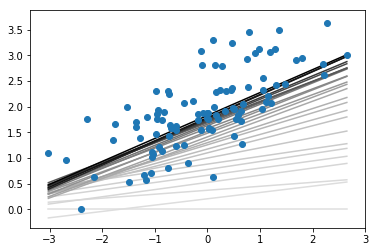

In [5]:
%matplotlib inline

import numpy as np
# Setting a random seed, feel free to change it and see different solutions.
np.random.seed(42)


# TODO: Fill in code in the function below to implement a gradient descent
# step for linear regression, following a squared error rule. See the docstring
# for parameters and returned variables.
def MSEStep(X, y, W, b, learn_rate = 0.001):
    """
    This function implements the gradient descent step for squared error as a
    performance metric.
    
    Parameters
    X : array of predictor features
    y : array of outcome values
    W : predictor feature coefficients
    b : regression function intercept
    learn_rate : learning rate

    Returns
    W_new : predictor feature coefficients following gradient descent step
    b_new : intercept following gradient descent step
    """
    
    # compute errors
    y_pred = np.matmul(X, W) + b
    error = y - y_pred
    print("Batch total error: {}".format(error.sum()))
    
    # compute steps
    W_new = W + learn_rate * np.matmul(error, X)
    b_new = b + learn_rate * error.sum()
    return W_new, b_new


# The parts of the script below will be run when you press the "Test Run"
# button. The gradient descent step will be performed multiple times on
# the provided dataset, and the returned list of regression coefficients
# will be plotted.
def miniBatchGD(X, y, batch_size = 20, learn_rate = 0.005, num_iter = 25):
    """
    This function performs mini-batch gradient descent on a given dataset.

    Parameters
    X : array of predictor features
    y : array of outcome values
    batch_size : how many data points will be sampled for each iteration
    learn_rate : learning rate
    num_iter : number of batches used

    Returns
    regression_coef : array of slopes and intercepts generated by gradient
      descent procedure
    """
    n_points = X.shape[0]
    W = np.zeros(X.shape[1]) # coefficients
    b = 0 # intercept
    
    # run iterations
    regression_coef = [np.hstack((W,b))]
    for _ in range(num_iter):
        batch = np.random.choice(range(n_points), batch_size)
        X_batch = X[batch,:]
        y_batch = y[batch]
        W, b = MSEStep(X_batch, y_batch, W, b, learn_rate)
        regression_coef.append(np.hstack((W,b)))
    
    return regression_coef

# perform gradient descent
data = np.loadtxt('gradient_data.csv', delimiter = ',')
X = data[:,:-1]
y = data[:,-1]
regression_coef = miniBatchGD(X, y)

# plot the results
import matplotlib.pyplot as plt

plt.figure()
X_min = X.min()
X_max = X.max()
counter = len(regression_coef)
for W, b in regression_coef:
    counter -= 1
    color = [1 - 0.92 ** counter for _ in range(3)]
    plt.plot([X_min, X_max],[X_min * W + b, X_max * W + b], color = color)
plt.scatter(X, y, zorder = 3)
plt.show()

### Single Linear Regression

In [6]:
# TODO: Add import statements
import pandas as pd
from sklearn.linear_model import LinearRegression

# Assign the dataframe to this variable.
# TODO: Load the data
bmi_life_data = pd.read_csv("bmi_and_life_expectancy.csv")

# Make and fit the linear regression model
#TODO: Fit the model and Assign it to bmi_life_model
bmi_life_model = LinearRegression()
bmi_life_model.fit(bmi_life_data[['BMI']], bmi_life_data[['Life expectancy']])

# Mak a prediction using the model
# TODO: Predict life expectancy for a BMI value of 21.07931
laos_life_exp = bmi_life_model.predict([[21.07931]])
print(laos_life_exp)

[[60.31564716]]


### Multiple Linear Regression

Linear regression but with multiple x-variables. (For example, if there are 2 x-variables, the resulting equation would draw a plane rather than a line).

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston

# Load the data from the boston house-prices dataset 
boston_data = load_boston()
x = boston_data['data']
y = boston_data['target']

# Make and fit the linear regression model
# TODO: Fit the model and Assign it to the model variable
model = LinearRegression()
model.fit(x, y)

# Make a prediction using the model
sample_house = [[2.29690000e-01, 0.00000000e+00, 1.05900000e+01, 0.00000000e+00, 4.89000000e-01,
                6.32600000e+00, 5.25000000e+01, 4.35490000e+00, 4.00000000e+00, 2.77000000e+02,
                1.86000000e+01, 3.94870000e+02, 1.09700000e+01]]
# TODO: Predict housing price for the sample_house
prediction = model.predict(sample_house)
print(prediction)

[23.68284712]


### Polynomial Regression

Linear regression but with one/multiple x-variable(s) and exponential values applied to them.

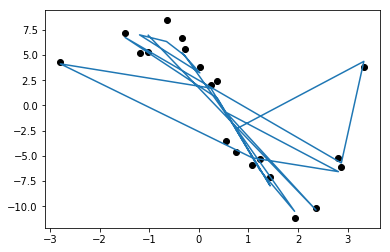

In [35]:
%matplotlib inline

# TODO: Add import statements
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Assign the data to predictor and outcome variables
# TODO: Load the data
train_data = pd.read_csv('poly_data.csv')
X = train_data['Var_X'].values.reshape(-1, 1)
y = train_data['Var_Y'].values

# Create polynomial features
# TODO: Create a PolynomialFeatures object, then fit and transform the
# predictor feature
poly_feat = PolynomialFeatures(degree = 4)
X_poly = poly_feat.fit_transform(X)

# Make and fit the polynomial regression model
# TODO: Create a LinearRegression object and fit it to the polynomial predictor
# features
poly_model = LinearRegression(fit_intercept = False).fit(X_poly, y)


# Plot outputs
import matplotlib.pyplot as plt
plt.scatter(X, y,  color='black')
plt.plot(X,poly_model.predict(poly_feat.fit_transform(X)))

plt.show()

### Regularization

* **L1 regularization**: add the sum of the absolute value of the coefficients to the error
* **L2 regularization**: add the sum of the squares of the coefficients to the error

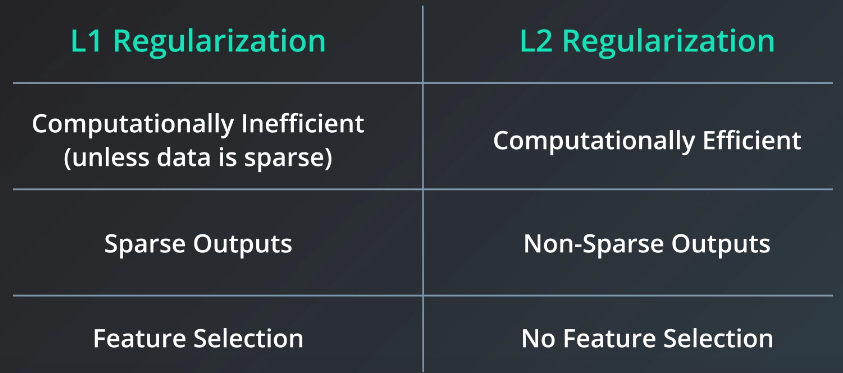

Scikit's Lasso model uses L1:

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

#### Feature Scaling

Feature scaling is a way of transforming your data into a common range of values. There are two common scalings:

1. **Standardizing**: taking each value of your column, subtracting the mean of the column, and then dividing by the standard deviation of the column; this will create a new "standardized" column where each value is a comparison to the mean of the column, and a new, standardized value can be interpreted as the number of standard deviations the original value was from the mean **(most commonly used technique)**
2. **Normalizing**: data are scaled between 0 and 1

In many machine learning algorithms, the result will change depending on the units of your data. This is especially true in two specific cases:

1. When your algorithm uses a distance-based metric to predict.
2. When you incorporate regularization.

https://www.quora.com/Why-do-we-normalize-the-data

In [41]:
# TODO: Add import statements
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import StandardScaler

# Assign the data to predictor and outcome variables
# TODO: Load the data
train_data = pd.read_csv('reg_data.csv', header = None)
X = train_data.iloc[:,:-1]
y = train_data.iloc[:,-1]

# TODO: Create the standardization scaling object.
scaler = StandardScaler()

# TODO: Fit the standardization parameters and scale the data.
X_scaled = scaler.fit_transform(X)

# TODO: Create the linear regression model with lasso regularization.
lin_reg = LinearRegression()
lasso_reg = Lasso()
std_lasso_reg = Lasso()

# TODO: Fit the model.
lin_reg.fit(X, y)
lasso_reg.fit(X, y)
std_lasso_reg.fit(X_scaled, y)

# TODO: Retrieve and print out the coefficients from the regression model.
print(lin_reg.coef_)
print(lasso_reg.coef_)
print(std_lasso_reg.coef_)

[-6.19918532e-03  2.96325160e+00  1.98199191e+00 -7.86249920e-02
 -3.95818772e+00  9.30786141e+00]
[ 0.          2.35793224  2.00441646 -0.05511954 -3.92808318  0.        ]
[  0.           3.90753617   9.02575748  -0.         -11.78303187
   0.45340137]


## Perceptron Algorithm

The perceptron algorithm involves adjusting the coefficients of the prediction equation (outputs negative or positive result) to best **classify** the data. The amount of adjustment is determined by adding (if result is negative) or subtracting (if result is positive) each of the data point's X values (moderated by a learning rate) from its corresponding coefficient. This will essentially divide up the data into buckets based on the trained boundary line.

In [25]:
import numpy as np
# Setting the random seed, feel free to change it and see different solutions.
np.random.seed(42)

def stepFunction(t):
    if t >= 0:
        return 1
    return 0

def prediction(X, W, b):
    return stepFunction((np.matmul(X,W)+b)[0])

# TODO: Fill in the code below to implement the perceptron trick.
# The function should receive as inputs the data X, the labels y,
# the weights W (as an array), and the bias b,
# update the weights and bias W, b, according to the perceptron algorithm,
# and return W and b.
def perceptronStep(X, y, W, b, learn_rate = 0.01):
    for i, (y_val,x) in enumerate(zip(y, X)):
        p = prediction(x, W, b)
        if p != y_val:
            if p == 1:
                W[0] -= (X[i][0] * learn_rate)
                W[1] -= (X[i][1] * learn_rate)
                b -= learn_rate
            else:
                W[0] += (X[i][0] * learn_rate)
                W[1] += (X[i][1] * learn_rate)
                b += learn_rate
    print('{}x_1 + {}x_2 + {} = y_hat'.format(round(W[0][0], 2), round(W[1][0], 2), round(b, 2)))
    return W, b
    
# This function runs the perceptron algorithm repeatedly on the dataset,
# and returns a few of the boundary lines obtained in the iterations,
# for plotting purposes.
# Feel free to play with the learning rate and the num_epochs,
# and see your results plotted below.
def trainPerceptronAlgorithm(X, y, learn_rate = 0.01, num_epochs = 25):
    x_min, x_max = min(X.T[0]), max(X.T[0])
    y_min, y_max = min(X.T[1]), max(X.T[1])
    W = np.array(np.random.rand(2,1))
    b = np.random.rand(1)[0] + x_max
    print('{}x_1 + {}x_2 + {} = y_hat'.format(round(W[0][0], 2), round(W[1][0], 2), round(b, 2)))
    print('--')
    # These are the solution lines that get plotted below.
    boundary_lines = []
    for i in range(num_epochs):
        # In each epoch, we apply the perceptron step.
        W, b = perceptronStep(X, y, W, b, learn_rate)
        boundary_lines.append((-W[0]/W[1], -b/W[1]))
    return boundary_lines


data = np.loadtxt('perceptron_data.csv', delimiter = ',')
X = data[:,:-1]
y = data[:,-1]
boundary_lines = trainPerceptronAlgorithm(X, y, num_epochs=5)

# plot the results
# import matplotlib.pyplot as plt

# plt.figure()
# X_min = X.min()
# X_max = X.max()
# counter = len(boundary_lines)
# for line in boundary_lines:
#     counter -= 1
#     color = [1 - 0.92 ** counter for _ in range(3)]
#     plt.plot([X_min, X_max],line, color = color)
# plt.scatter(X.T[0], X.T[1], zorder = 3)
# plt.show()

0.37x_1 + 0.95x_2 + 1.73 = y_hat
--
0.03x_1 + 0.6x_2 + 1.23 = y_hat
-0.31x_1 + 0.25x_2 + 0.73 = y_hat
-0.57x_1 + -0.01x_2 + 0.34 = y_hat
-0.58x_1 + -0.04x_2 + 0.31 = y_hat
-0.58x_1 + -0.06x_2 + 0.29 = y_hat


In [12]:
import numpy as np

W = np.array(np.random.rand(2,1))
W.T, W.T[0], W.T[0][0]
W, W[0], W.T[0]

(array([[0.70807258],
        [0.02058449]]), array([0.70807258]), array([0.70807258, 0.02058449]))

## Decision Trees

Classify and subclassify the data into buckets in a way that reduces entropy and thereby increases information gain. "The problem of learning an optimal decision tree is known to be NP-complete"... lol

### Entropy Formula

$ entropy = -\frac{m}{n+m}\log_{2}{\frac{m}{n+m}}-\frac{n}{n+m}\log_{2}{\frac{n}{n+m}} $

What is the entropy for a bucket with a ratio of four red balls to ten blue balls? Input your answer to at least three decimal places.

In [30]:
import math
entropy = lambda m,n: -(m/(n+m))*math.log((m/(n+m)), 2) \
                     - (n/(n+m))*math.log((n/(n+m)), 2)
entropy(4,10)

0.863120568566631

restated formula...

$ p_1 = \frac{m}{n+m+...} $

$ p_2 = \frac{n}{n+m+...} $

$ ... $

$ p_n = ... $

$ entropy = -p_1\log_{2}(p_1)-p_2\log_{2}(p_2)-...-p_n\log_{2}{(p_n)} $

$ entropy = -\sum\limits_{i=1}^n p_i\log_{2}p_i $

#### Question:

If we have a bucket with eight red balls, three blue balls, and two yellow balls, what is the entropy of the set of balls? Input your answer to at least three decimal places.

In [32]:
import math
prob = lambda n, opts: n/sum(opts)
entropy = lambda opts: -sum([prob(n,opts)*math.log(prob(n,opts), 2) for n in opts])
entropy([8, 3, 2])

1.3346791410515946

### Information Gain

$ InformationGain = Entropy(Parent)−[\frac{m}{n+m}Entropy(Child_1)+\frac{n}{n+m}Entropy(Child_2)] $

#### Question:

Which of the following splitting criteria provides the most information gain for discriminating Mobugs from Lobugs?

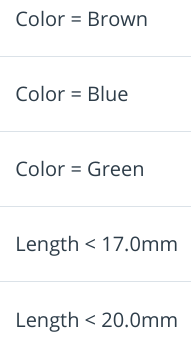

In [68]:
import pandas as pd
data = pd.read_csv('infogain_data.csv')
species = data.iloc[:,0]
colors = data.iloc[:,1]
lengths = data.iloc[:,2]

import math
prob = lambda n, opts: n/sum(opts)
entropy = lambda opts: -sum([prob(n,opts)*math.log(prob(n,opts), 2) for n in opts])

from collections import Counter, defaultdict
# Counter.values will be frequencies of each grouped key
species_entropy = entropy(Counter(species).values())
print('Species', species_entropy)

# {(color, species): num}
_species_freqs = Counter(zip(colors, species))
_sf = _species_freqs
metrics = ('Brown', 'Blue', 'Green')
for m in metrics:
    # {(m, species): num}
    _new_sf = defaultdict(int)
    for (c,s),n in _sf.items():
        if c == m:
            _new_sf[('==',s)] += n
        else:
            _new_sf[('!=',s)] += n
    # num lists grouped by m or not-m
    _opts_map = {color: [n for (c,s),n in _new_sf.items() if c == color] for color in ('==', '!=')}
    _entropies = {c:entropy(opts) for c,opts in _opts_map.items()}

    _total = sum([sum(v) for v in _opts_map.values()])
    child_avgs = [sum(_opts_map[b])/_total*e for b,e in _entropies.items()]
    print(m, species_entropy-sum(child_avgs))

_species_freqs = Counter(zip(lengths, species))
_sf = _species_freqs
metrics = (17.0, 20.0)
for m in metrics:
    _new_sf = defaultdict(int)
    for (l,s),n in _sf.items():
        if l < m:
            _new_sf[('<',s)] += n
        else:
            _new_sf[('>=',s)] += n
    _opts_map = {length: [n for (l,s),n in _new_sf.items() if l == length] for length in ('<', '>=')}
    _entropies = {l:entropy(opts) for l,opts in _opts_map.items()}

    _total = sum([sum(v) for v in _opts_map.values()])
    child_avgs = [sum(_opts_map[b])/_total*e for b,e in _entropies.items()]
    print('<{}'.format(m), species_entropy-sum(child_avgs))


Species 0.9798687566511527
Brown 0.06157292259666314
Blue 0.0005895962750604999
Green 0.042776048498108454
<17.0 0.11260735516748943
<20.0 0.10073322588651712


In [67]:
def two_group_ent(first, tot):
    return -(first/tot*np.log2(first/tot) + \
             (tot-first)/tot*np.log2((tot-first)/tot))
# 10 are Mobug, 14 are Lobug
tot_ent = two_group_ent(10, 24)
# 15 are >= 17... 11 are Lobug, 4 are Mobug
# 9 are < 17... 6 are Mobug, 3 are Lobug
g17_ent = 15/24 * two_group_ent(11,15) + \
           9/24 * two_group_ent(6,9)

tot_ent - g17_ent

0.11260735516748954

### Overview of Information Gain

**Entropy** is a measure of randomness, and **information gain** is a measure of the ability to classify the data (bucketing the data into groups). So, the higher the entropy from a classification strategy, the lower the information gain.

Information gain is calculated by subtracting the entropy of the dataset (the **parent**) and the summed weighted entropy of the classified buckets (the **children**).

So if the classification strategy is "is a number less than 10", then the information gain would be the parent entropy minus the weighted entropy of the "<10" and the ">=10" datasets.

### Hyperparameters

* max_depth: The maximum number of levels in the tree.
* min_samples_leaf: The minimum number of samples allowed in a leaf.
* min_samples_split: The minimum number of samples required to split an internal node.

**Large depth** very often causes overfitting, since a tree that is too deep, can memorize the data. **Small depth** can result in a very simple model, which may cause underfitting.

**Small minimum samples** per split may result in a complicated, highly branched tree, which can mean the model has memorized the data, or in other words, overfit. **Large minimum samples** may result in the tree not having enough flexibility to get built, and may result in underfitting.

### Scikit Learn Decision Tree

https://scikit-learn.org/stable/modules/tree.html#tree

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

how to plot:

https://scikit-learn.org/stable/auto_examples/tree/plot_iris_dtc.html#sphx-glr-auto-examples-tree-plot-iris-dtc-py

,0,1,2
0,0.24539,0.81725,0
1,0.21774,0.76462,0
2,0.20161,0.69737,0
3,0.20161,0.58041,0
4,0.24770,0.49561,0


1.0


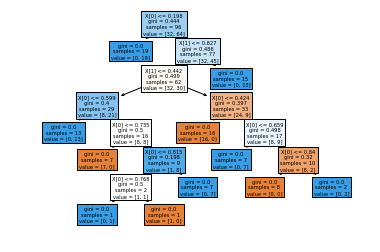

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import display # Allows the use of display() for DataFrames

# Import statements 
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

# Read the data.
data = pd.read_csv('decision_tree_data.csv', header=None)
display(data.head())
data = np.asarray(data)
# Assign the features to the variable X, and the labels to the variable y. 
X = data[:,0:2]
y = data[:,2]

# TODO: Create the decision tree model and assign it to the variable model.
# You won't need to, but if you'd like, play with hyperparameters such
# as max_depth and min_samples_leaf and see what they do to the decision
# boundary.
model = DecisionTreeClassifier()

# TODO: Fit the model.
model.fit(X,y)

# TODO: Make predictions. Store them in the variable y_pred.
y_pred = model.predict(X)

# TODO: Calculate the accuracy and assign it to the variable acc.
acc = accuracy_score(y, y_pred)
print(acc)

plt.figure()
plot_tree(model.fit(X,y), filled=True)
plt.show()

### One Hot Encoding

Turn categorical data into binary data, each category value being turned into its own category (each data value is or is not that category).

https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f

### Titanic decision tree problem

See http://localhost:8888/notebooks/decision_trees_titanic.ipynb

## Bayes Theorem

Bayes theorem calculates the probability of an event occurring, based on certain other probabilities that are related to the event in question. It is composed of "prior probabilities" - or just "priors." These "priors" are the probabilities that we are aware of, or that are given to us. And Bayes theorem is also composed of the "posterior probabilities," or just "posteriors," which are the probabilities we are looking to compute using the "priors".

* **prior**: inferred probability prior to information
* **posterior**: probability after new information has been taken into account

Bayes formula:

$ P(A|R) = \frac{P(R|A)P(A)}{P(R)} $

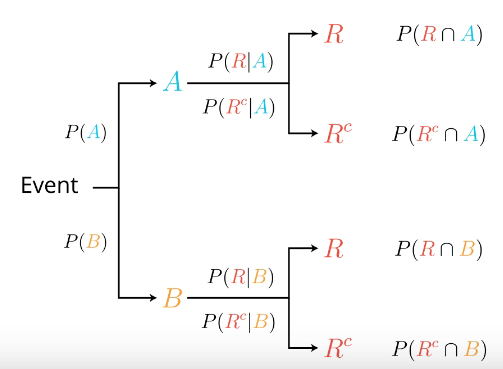

prior probabilities before knowing R occurred:

$ P(A) $

$ P(B) $

posterior probabilities after knowing R occurred ($ P(R) = 1 $):

$ P(A|R) = P(R\cap A) = P(A)P(R|A) $

$ P(A|R^c) = P(R^c\cap A) $

$ P(B|R) = P(R\cap B) = P(B)P(R|B) $

$ P(B|R^c) = P(R^c\cap B) $

now normalize so that the sum equals 1:

$ P(A|R) = \frac{P(A)P(R|A)}{P(A)P(R|A)+P(B)P(R|B)} $

$ P(B|R) = \frac{P(B)P(R|B)}{P(A)P(R|A)+P(B)P(R|B)} $

**Naive Bayes theorem** makes the assumption that the events are independent from one another, so that the probability of an outcome given a series of events is proportional to the product of the probabilities for the outcome given each of the series.

$ P(R_1\cap R_2)\propto P(R_1)P(R_2) $

and

$ P(A|R)\propto P(R|A)P(A) $

therefore

$ P(A|R_1\cap R_2)\propto P(R_1|A)P(R_2|A)P(A) $

(then normalize to get probability)

Naive Bayes formula:

$ P(y|x_1,...,x_n) = \frac{P(y)P(x_1,...,x_n|y)}{P(x_1,...,x_n)} $

#### Question:

Suppose you have a bag with three standard 6-sided dice with face values [1,2,3,4,5,6] and two non-standard 6-sided dice with face values [2,3,3,4,4,5]. Someone draws a die from the bag, rolls it, and announces it was a 3. What is the probability that the die that was rolled was a standard die?

Input your answer as a fraction or as a decimal with at least three digits of precision.

In [14]:
prob_stand = 3/5
prob_nonstand = 2/5
prob_3_from_stand = 1/6
prob_3_from_nonstand = 1/3
prob_stand_given_3 = (prob_stand*prob_3_from_stand)/ \
    ((prob_stand*prob_3_from_stand)+(prob_nonstand*prob_3_from_nonstand))
print(prob_stand_given_3)

0.42857142857142855


### Sensitivity and Specificity

$ P(A) = [P(R) * Sensitivity] + [P(\newcommand*{\lsim}{\mathord{\sim}}R) * (1-Specificity)] $

$ Sensitivity = P(A|R) $

$ Specificity = P(\newcommand*{\lsim}{\mathord{\sim}}A|\newcommand*{\lsim}{\mathord{\sim}}R) $

therefore

$ P(A) = [P(R) * P(A|R)] + [P(\newcommand*{\lsim}{\mathord{\sim}}R) * (1-P(\newcommand*{\lsim}{\mathord{\sim}}A|\newcommand*{\lsim}{\mathord{\sim}}R))] $

### Multinomial vs Gaussian

The **multinomial** Naive Bayes algorithm is suitable for classification with discrete features (such as, word counts for text classification). On the other hand, **Gaussian** Naive Bayes is better suited for continuous data as it assumes that the input data has a Gaussian (normal) distribution.

### Naive Bayes advantages

One of the major advantages that Naive Bayes has over other classification algorithms is its ability to handle an extremely **large number of features**. Also, it performs well even with the **presence of irrelevant features** and is relatively unaffected by them. The other major advantage it has is its relative **simplicity**. Naive Bayes' works well right out of the box and tuning its parameters is rarely ever necessary, except usually in cases where the distribution of the data is known. It rarely ever overfits the data. Another important advantage is that its model training and prediction times are very **fast** for the amount of data it can handle.

## Support Vector Machines

The SVM algorithm is similar to the Perceptron algorithm, but the classification error now includes data points that are within a set of margin lines (even if correctly classified), and there is now also a **margin error** which is compared to the margin errors of from other boundary lines from the gradient descent process. The smaller the margin, the greater the error.

$ MarginDistance = \frac{2}{\left\|{W}\right\|} $

$ MarginError = \left\|{W}\right\|^2 $

the norm of a vector is the square root of the sum of the squares of the vector:

$ \left\|{W}\right\| = \sqrt{W_1^2+W_2^2+...+W_n^2} $

so the margin error formula is similar to the L2 regularization formula

The **C parameter** allows adjusting the importance of the classification error. A large C means the focus is on classifying points, a small C means the focus is on a large margin.

$ Error = C * ClassificationError + MarginError $

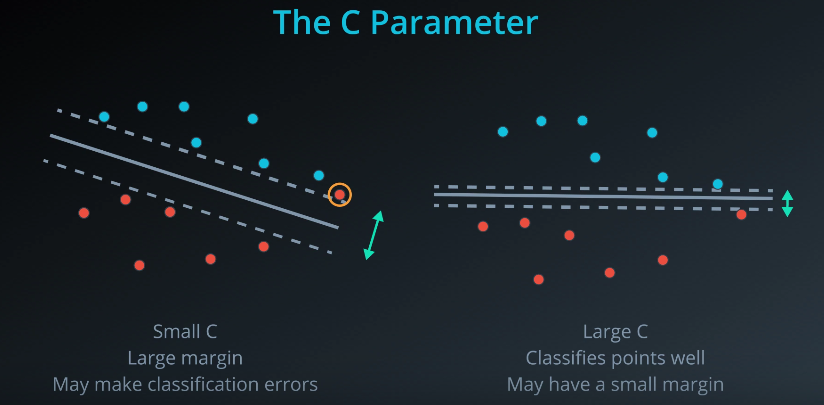

### Kernel Trick

If a line is not able to split the data, but there are still groups of data, the kernel trick may be used by transposing the data onto a polynomial line such that the SVM algorithm may be used to draw a line through the new dataset.

The **RBF (radial basis function) Kernel** constructs a polynomial line for each point, and for each point a set of coordinates based on the distances between the point and each polynomial line. The new coordinates per point are plotted in n-dimensional space to be able for the SVM algorithm to run and construct an n-1-dimensional equation. The coefficients of that equation are then multiplied onto the corresponding polynomial lines, and the constant becomes the linear line drawn through the combined polynomial line.

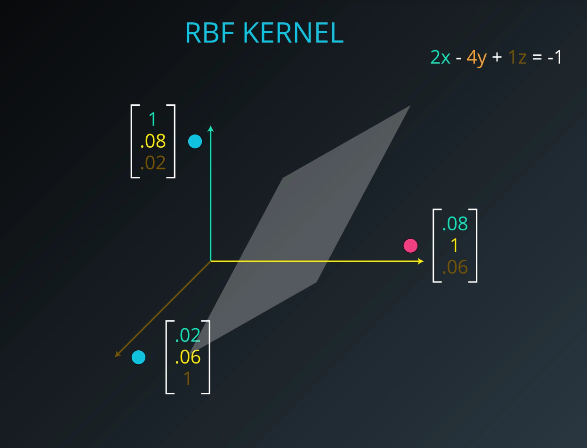

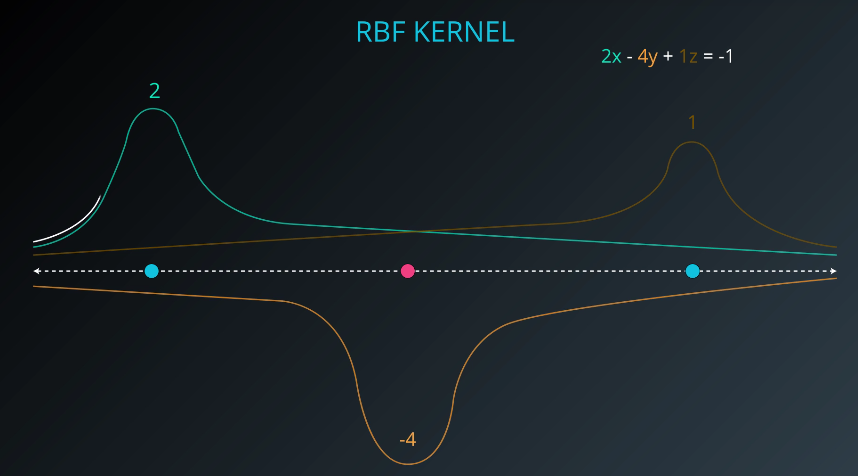

The **Gamma parameter** is a hyperparameter tuned during training that applies to the polynomial lines to increase their size. Large gamma tends to overfit, while small gamma tends to underfit.

A **Gaussian curve** is used to plot the poynomial lines and determine the value of gamma. High sigma means low gamma, and vice versa.

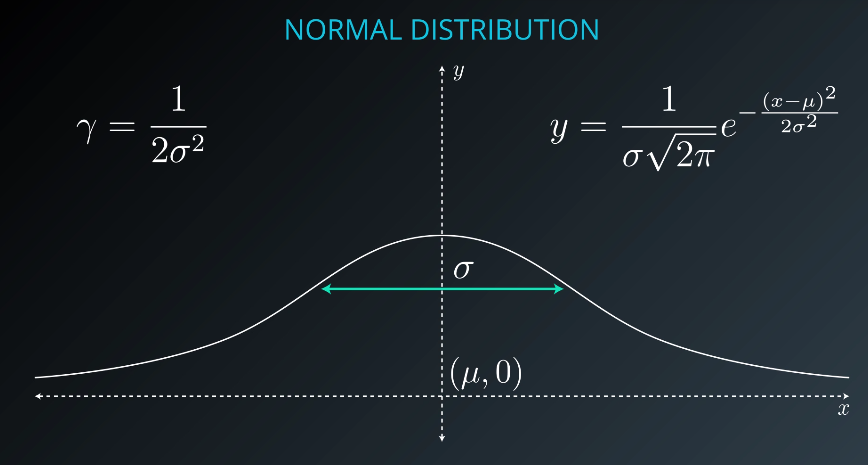

#### Scikit SVM

https://scikit-learn.org/stable/modules/svm.html

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [5]:
# Import statements 
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

# Read the data.
data = np.asarray(pd.read_csv('svm_data.csv', header=None))
# Assign the features to the variable X, and the labels to the variable y. 
X = data[:,0:2]
y = data[:,2]

# TODO: Create the model and assign it to the variable model.
# Find the right parameters for this model to achieve 100% accuracy on the dataset.
model = SVC(C=8.0, kernel='rbf', gamma=9)

# TODO: Fit the model.
model.fit(X, y)

# TODO: Make predictions. Store them in the variable y_pred.
y_pred = model.predict(X)

# TODO: Calculate the accuracy and assign it to the variable acc.
acc = accuracy_score(y, y_pred)
print(acc)

1.0


### More Resources

[Support Vector Machines are described in Introduction to Statistical Learning starting on page 337.](http://www-bcf.usc.edu/~gareth/ISL/ISLR%20First%20Printing.pdf)

[The wikipedia page related to SVMs](https://en.wikipedia.org/wiki/Support_vector_machine)

[The derivation of SVMs from Stanford's CS229 notes.](http://cs229.stanford.edu/notes/cs229-notes3.pdf)

## Ensemble Methods

Joining together models to get a better model. 2 methods:
1. **Bagging** (bootstrap aggregating): combining multiple predictions to get a more accurate prediction
2. **Boosting**: focusing on the strengths of each model and then combining the results

There are two competing variables in finding a well fitting machine learning model:
1. **Bias**: When a model has high bias, this means that means it doesn't do a good job of bending to the data. An example of an algorithm that usually has high bias is linear regression. Even with completely different datasets, we end up with the same line fit to the data. When models have high bias, this is bad.
2. **Variance**: When a model has high variance, this means that it changes drastically to meet the needs of every point in our dataset. Linear models like the one above has low variance, but high bias. An example of an algorithm that tends to have high variance and low bias is a decision tree (especially decision trees with no early stopping parameters). A decision tree, as a high variance algorithm, will attempt to split every point into its own branch if possible. This is a trait of high variance, low bias algorithms - they are extremely flexible to fit exactly whatever data they see.

**High Bias, Low Variance** models tend to underfit data, as they are not flexible. Linear models fall into this category of models.

**High Variance, Low Bias** models tend to overfit data, as they are too flexible. Decision trees fall into this category of models.

https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff

By combining algorithms, we can often build models that perform better by meeting in the middle in terms of bias and variance. There are some other tactics that are used to combine algorithms in ways that help them perform better as well. These ideas are based on minimizing bias and variance based on mathematical theories, like the central limit theorem.

Another method that is used to improve ensemble methods is to introduce **randomness** into high variance algorithms before they are ensembled together. The introduction of randomness combats the tendency of these algorithms to overfit (or fit directly to the data available). There are two main ways that randomness is introduced:
1. **Bootstrap the data**: sampling the data with replacement and fitting your algorithm to the sampled data
2. **Subset the features**: in each split of a decision tree or with each algorithm used in an ensemble, only a subset of the total possible features are used

### Radom Forests

Take subsets of features at random and build separate decision trees for those subsets. Then, the final prediction is determined by whatever decision tree prediction occurs the most.

### Bagging

Pick fully random subsets of data and run simple models (e.g. 2-leaf decision trees) on each. Each model is a "weak learner", and the "strong learner" is the result of determining whatever weak learner prediction occurs the most.

### Boosting

AdaBoost is the bagging method but each model is minimizing classification error and punishing the misclassified points more from the previous model run (adding weights to the misclassified points enough to make the previous model a 50/50 model). The models are then combined by attributing higher weight to the highest and lowest accuracy models.

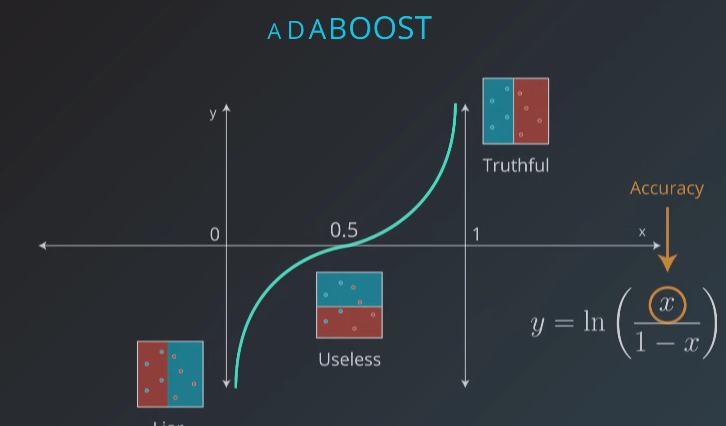

$ weight = ln(\frac{accuracy}{1-accuracy}) = ln(\frac{\#correct}{\#incorrect}) $

If a model is perfectly correct or perfectly incorrect, just use that model or negation of it respectively and ignore the other models.

After computing the weights, for all regions divided by the models, add the weight for the positive regions and subtract the weight for the negative classification regions. The final model determines positive classification from the positive-weighted regions and negative-weighted regions.

#### Additional Resources

1. [The original paper](https://cseweb.ucsd.edu/~yfreund/papers/IntroToBoosting.pdf) - A link to the original paper on boosting by Yoav Freund and Robert E. Schapire.
2. [An explanation about why boosting is so important](http://blog.kaggle.com/2017/01/23/a-kaggle-master-explains-gradient-boosting/) - A great article on boosting by a Kaggle master, Ben Gorman.
3. [A useful Quora post](https://www.quora.com/What-is-an-intuitive-explanation-of-Gradient-Boosting) - A number of useful explanations about boosting.

In [10]:
import math
accuracy = lambda correct, total: correct/total
weight = lambda accuracy: math.log(accuracy/(1-accuracy))
print(weight(accuracy(7,8)))
print(weight(accuracy(4,8)))
print(weight(accuracy(2,8)))

1.9459101490553132
0.0
-1.0986122886681098


### AdaBoost in sklearn

http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html#sklearn.ensemble.BaggingClassifier

http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html

http://scikit-learn.org/stable/modules/ensemble.html

## Model Evaluation Metrics

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [3]:
# Import statements 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

# Import the train test split
# http://scikit-learn.org/0.16/modules/generated/sklearn.cross_validation.train_test_split.html
from sklearn.model_selection import train_test_split

# Read in the data.
data = np.asarray(pd.read_csv('testing_data.csv', header=None))
# Assign the features to the variable X, and the labels to the variable y. 
X = data[:,0:2]
y = data[:,2]

# Use train test split to split your data 
# Use a test size of 25% and a random state of 42
X_train, X_test, y_train, y_test = train_test_split(X,y)

# Instantiate your decision tree model
model = DecisionTreeClassifier()

# TODO: Fit the model to the training data.
model.fit(X_train, y_train)

# TODO: Make predictions on the test data
y_pred = model.predict(X_test)

# TODO: Calculate the accuracy and assign it to the variable acc on the test data.
acc = accuracy_score(y_test, y_pred)
print(acc)

0.9166666666666666


### Confusion Matrix

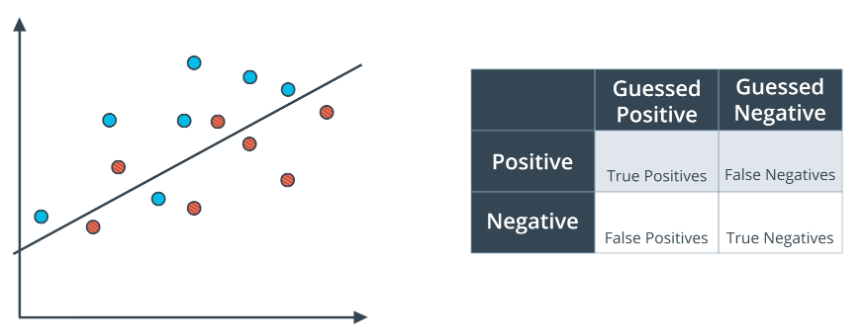

### Type 1 and Type 2 Errors

- **Type 1 Error (Error of the first kind, or False Positive)**: In the medical example, this is when we misdiagnose a healthy patient as sick.
- **Type 2 Error (Error of the second kind, or False Negative)**: In the medical example, this is when we misdiagnose a sick patient as healthy.

### Accuracy, Precision, Recall

**Accuracy** measures how often the classifier makes the correct prediction. It’s the ratio of the number of correct predictions to the total number of predictions (the number of test data points).

$ \frac{TruePositives + TrueNegatives}{Positives + Negatives} $

**Precision** is a ratio of true positives to all positives. In other words, precision is the ratio of

$ \frac{TruePositives}{TruePositives + FalsePositives} $

**Recall (sensitivity)** is a ratio of true positives to all the data points for a certain outcome. In other words, recall is the ratio of

$ \frac{TruePositives}{TruePositives + FalseNegatives} $

The **F1 score** is the weighted average (harmonic mean) of the precision and recall scores. This score can range from 0 to 1, with 1 being the best possible F1 score:

$ 2 * \frac{Precision*Recall}{Precision+Recall} $

The **F-beta score** is the F1 score but skewed towards either precision (lower beta) or recall (higher beta) using a constant term (beta).

$ (1+\beta^2)\frac{Precision*Recall}{\beta^2*Precision+Recall} $

The boundaries of beta are between 0 and $ \infty $:

- If $ \beta = 0 $, then we get **precision**.
- If $ \beta = \infty $, then we get **recall**.
- For other values of $ \beta $, if they are close to 0, we get something close to precision, if they are large numbers, then we get something close to recall, and if $ \beta = 1 $, then we get the **harmonic mean** of precision and recall.

#### Question:

How many True Positives, True Negatives, False Positives, and False Negatives, are in the model above? Please enter your answer in that order, as four numbers separated by a comma and a space. For example, if your answers are 1, 2, 3, and 4, enter the string `1, 2, 3, 4`.

Remember, in the image above the blue points are considered positives and the red points are considered negatives.

#### Answer:

`6, 5, 2, 1`

#### Question:

What is the accuracy of the model above? Please enter the answer as a percentage, with two decimals. For example, `54.75`.

#### Answer:

`(6+5)/(8+6) * 100 = 11/14 * 100 = 78.57%`

#### Question:

What is the precision of the linear model above? Please write the number as a decimal, like 0.45 or as a fraction, like 3/5.

#### Answer:

`6/(6+2) = 6/8 = 3/4`

#### Question:

What is the recall of the linear model above? Please write your number as a decimal, like 0.45 or as a fraction, like 3/5.

#### Answer:

`6/(6+1) = 6/7`

#### Question:

If the Precision of the medical model is 55.6%, and the Recall is 83.3%, what is the F1 Score? (Please write your answer as a percentage, and round it to 1 decimal point.)

#### Answer:

`(2*55.6*83.3)/(55.6+83.3) = 66.7`

#### Example:

- **Spaceship model**: We can't really afford any malfunctioning parts, and it's ok if we overcheck some of the parts that are working well. Therefore, this is a **high recall** model, so we associate it with beta = 2.
- **Notifications model**: Since it's free to send them, we won't get harmed too much if we send them to more people than we need to. But we also shouldn't overdo it, since it will annoy the users. We also would like to find as many interested users as we can. Thus, this is a model which should have a decent **precision** and a decent **recall**. Beta = 1 should work here.
- **Promotional Material model**: Since it costs us to send the material, we really don't want to send it to many people that won't be interested. Thus, this is a **high precision** model. Thus, beta = 0.5 will work here.

### Receiver Operating Characteristic (ROC) Curve

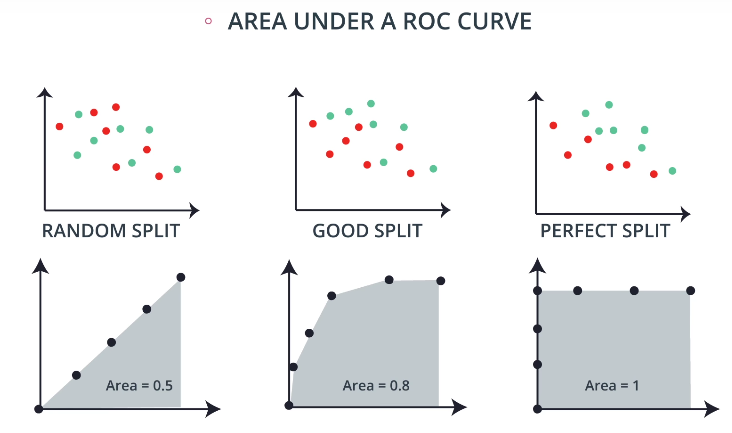

The points are determined by taking every possible split in the data and determing the precision of positives and the precision of negatives. Closer the area under the curve is to 1, the better the model.

In [6]:
import numpy as np

x = np.arange(9.).reshape(3, 3)
print(x)
x[np.where( x > 5 )]

[[0. 1. 2.]
 [3. 4. 5.]
 [6. 7. 8.]]


array([6., 7., 8.])

Recap
In this lesson, you got a glimpse at the ways that we can measure how well our models are performing.

Training & Testing Data
First, it is important to always split your data into training and testing. Then you will measure how well your model performs on the test set of data after being fit training data.

Classification Measures
If you are fitting your model to predict categorical data (spam not spam), there are different measures to understand how well your model is performing than if you are predicting numeric values (the price of a home).

As we look at classification metrics, note that the wikipedia page on this topic is wonderful, but also a bit daunting. I frequently use it to remember which metric does what.

Specifically, you saw how to calculate:

Accuracy
Accuracy is often used to compare models, as it tells us the proportion of observations we correctly labeled.


Often accuracy is not the only metric you should be optimizing on. This is especially the case when you have class imbalance in your data. Optimizing on only accuracy can be misleading in how well your model is truly performing. With that in mind, you saw some additional metrics.

Precision
Precision focuses on the predicted "positive" values in your dataset. By optimizing based on precision values, you are determining if you are doing a good job of predicting the positive values, as compared to predicting negative values as positive.


Recall
Recall focuses on the actual "positive" values in your dataset. By optimizing based on recall values, you are determining if you are doing a good job of predicting the positive values without regard of how you are doing on the actual negative values. If you want to perform something similar to recall on the actual 'negative' values, this is called specificity (TN / (TN + FP)).


F-Beta Score
In order to look at a combination of metrics at the same time, there are some common techniques like the F-Beta Score (where the F1 score is frequently used), as well as the ROC and AUC. You can see that the \betaβ parameter controls the degree to which precision is weighed into the F score, which allows precision and recall to be considered simultaneously. The most common value for beta is 1, as this is where you are finding the harmonic average between precision and recall.


ROC Curve & AUC
By finding different thresholds for our classification metrics, we can measure the area under the curve (where the curve is known as a ROC curve). Similar to each of the other metrics above, when the AUC is higher (closer to 1), this suggests that our model performance is better than when our metric is close to 0.


You may end up choosing to optimize on any of these measures. I commonly end up using AUC or an F1 score in practice. However, there are always reason to choose one measure over another depending on your situation.

Regression Measures
You want to measure how well your algorithms are performing on predicting numeric values? In these cases, there are three main metrics that are frequently used. mean absolute error, mean squared error, and r2 values.

As an important note, optimizing on the mean absolute error may lead to a different 'best model' than if you optimize on the mean squared error. However, optimizing on the mean squared error will always lead to the same 'best' model as if you were to optimize on the r2 value.

Again, if you choose a model with the best r2 value (the highest), it will also be the model that has the lowest (MSE). Choosing one versus another is based on which one you feel most comfortable explaining to someone else.

Mean Absolute Error (MAE)
The first metric you saw was the mean absolute error. This is a useful metric to optimize on when the value you are trying to predict follows a skewed distribution. Optimizing on an absolute value is particularly helpful in these cases because outliers will not influence models attempting to optimize on this metric as much as if you use the mean squared error. The optimal value for this technique is the median value. When you optimize for the R2 value of the mean squared error, the optimal value is actually the mean.


Mean-Squared Error (MSE)
The mean squared error is by far the most used metric for optimization in regression problems. Similar to with MAE, you want to find a model that minimizes this value. This metric can be greatly impacted by skewed distributions and outliers. When a model is considered optimal via MAE, but not for MSE, it is useful to keep this in mind. In many cases, it is easier to actually optimize on MSE, as the a quadratic term is differentiable. However, an absolute value is not differentiable. This factor makes this metric better for gradient based optimization algorithms.


R2 Score
Finally, the r2 value is another common metric when looking at regression values. Optimizing a model to have the lowest MSE will also optimize a model to have the the highest R2 value. This is a convenient feature of this metric. The R2 value is frequently interpreted as the 'amount of variability' captured by a model. Therefore, you can think of MSE, as the average amount you miss by across all the points, and the R2 value as the amount of the variability in the points that you capture with a model.


Closing Words
This ends this lesson on metrics. In the final lesson before the project, you will get some practice tuning and optimizing your models.

## Training and Tuning

### Learning Curves

A measure of how well the model does based on the training and cross-validation data.

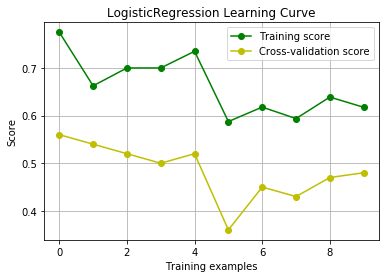

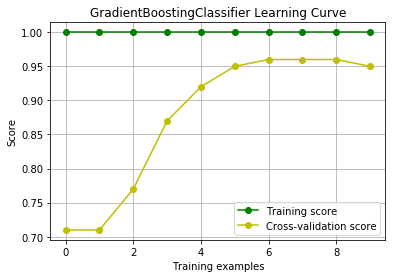

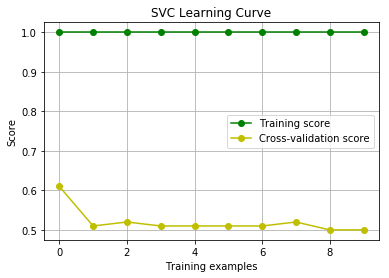

In [6]:
%matplotlib inline

# Import, read, and split data
import pandas as pd
data = pd.read_csv('tuning_data.csv')
import numpy as np
X = np.array(data[['x1', 'x2']])
y = np.array(data['y'])

# Fix random seed
np.random.seed(55)

### Imports
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

# TODO: Uncomment one of the three classifiers, and hit "Test Run"
# to see the learning curve. Use these to answer the quiz below.

### Logistic Regression
logistic_estimator = LogisticRegression()

### Decision Tree
gradient_estimator = GradientBoostingClassifier()

### Support Vector Machine
svm_estimator = SVC(kernel='rbf', gamma=1000)


from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

# It is good to randomize the data before drawing Learning Curves
def randomize(X, Y):
    permutation = np.random.permutation(Y.shape[0])
    X2 = X[permutation,:]
    Y2 = Y[permutation]
    return X2, Y2

X2, y2 = randomize(X, y)

def draw_learning_curves(X, y, estimator, num_trainings):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X2, y2, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, num_trainings))

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.title("{} Learning Curve".format(estimator.__class__.__name__))
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    plt.plot(train_scores_mean, 'o-', color="g",
             label="Training score")
    plt.plot(test_scores_mean, 'o-', color="y",
             label="Cross-validation score")


    plt.legend(loc="best")

    plt.show()
    
draw_learning_curves(X2, y2, logistic_estimator, 10)
draw_learning_curves(X2, y2, gradient_estimator, 10)
draw_learning_curves(X2, y2, svm_estimator, 10)

We can observe from the curves that:
- The **Logistic Regression** model has a low training and testing score.
- The **Decision Tree** model has a high training and testing score.
- The **Support Vector Machine** model has a high training score, and a low testing score.

From here, we can determine that the Logistic Regression model underfits, the SVM model overfits, and the Decision Tree model is just right.

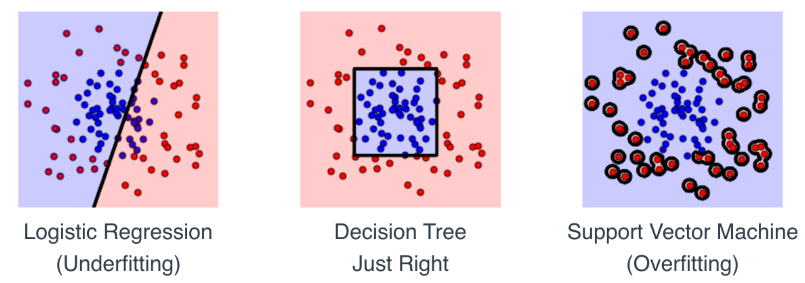